## Setup

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_CSV = '/home/jovyan/data/knotprot_cores_overlaps_len_var.csv'
CSV_DELIMETER = ';'
PATCH_SIZES = [10, 50, 80, 200]

## Load data:

In [3]:
with open(DATA_CSV, newline='') as f:
    reader = csv.reader(f, delimiter=CSV_DELIMETER)
    data = list(reader)

data[0]

['seq',
 'patch_10_preds',
 'patch_10_min_pos_start',
 'patch_10_min_pos_end',
 'patch_10_min_pred',
 'patch_50_preds',
 'patch_50_min_pos_start',
 'patch_50_min_pos_end',
 'patch_50_min_pred',
 'patch_80_preds',
 'patch_80_min_pos_start',
 'patch_80_min_pos_end',
 'patch_80_min_pred',
 'patch_200_preds',
 'patch_200_min_pos_start',
 'patch_200_min_pos_end',
 'patch_200_min_pred',
 'real_start',
 'real_end']

In [4]:
scores_df = pd.DataFrame(data[1:], columns=data[0])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,patch_80_min_pos_start,patch_80_min_pos_end,patch_80_min_pred,patch_200_preds,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",85.0,135.0,0.9998247027397156,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",55.0,135.0,0.005920272320508957,"[1.0, 0.009687763638794422, 0.0151335140690207...",0.0,200.0,0.009687763638794422,89,132
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9990893602371216, 0.9986838698387146, 0.998...",49.0,59.0,0.5080617070198059,"[0.9990893602371216, 0.9162245988845825, 0.880...",288.0,338.0,0.07590502500534058,"[0.9990893602371216, 0.891124427318573, 0.8160...",261.0,341.0,0.05115405470132828,"[0.9990893602371216, 0.935649037361145, 0.9216...",138.0,338.0,0.1996607631444931,46,369
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9983654618263245, 0.9976728558540344, 0.997...",323.0,333.0,0.39174628257751465,"[0.9983654618263245, 0.8798249363899231, 0.833...",293.0,343.0,0.0229170098900795,"[0.9983654618263245, 0.8471633195877075, 0.754...",262.0,342.0,0.018121030181646347,"[0.9983654618263245, 0.9058640003204346, 0.886...",141.0,341.0,0.07605931162834167,46,369
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9963602423667908, 0.9947852492332458, 0.994...",323.0,333.0,0.20062221586704254,"[0.9963602423667908, 0.7498754858970642, 0.671...",293.0,343.0,0.008469900116324425,"[0.9963602423667908, 0.6929655075073242, 0.553...",262.0,342.0,0.006644322071224451,"[0.9963602423667908, 0.7984932065010071, 0.762...",141.0,341.0,0.02984178252518177,46,369
4,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,"[0.06945338100194931, 0.04197914898395538, 0.0...",333.0,343.0,0.00046170904533937573,"[0.06945338100194931, 0.01355342473834753, 0.0...",291.0,341.0,1.5395220543723553e-05,"[0.06945338100194931, 0.04074830934405327, 0.0...",259.0,339.0,7.954141437949147e-06,"[0.06945338100194931, 0.6244462132453918, 0.61...",141.0,341.0,0.00030155613785609603,43,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,"[0.009979221038520336, 0.003908189479261637, 0...",33.0,43.0,1.4008035122969886e-06,"[0.009979221038520336, 2.009952822845662e-06, ...",22.0,72.0,1.818666191866214e-06,"[0.009979221038520336, 7.866733358241618e-05, ...",33.0,113.0,2.578786961748847e-06,"[0.009979221038520336, 0.004729753825813532, 0...",231.0,431.0,0.001778103644028306,229,337
943,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,"[0.0006824992597103119, 0.0006852783844806254,...",270.0,280.0,2.821637110628217e-07,"[0.0006824992597103119, 0.0005824532709084451,...",233.0,283.0,1.9206358956580516e-06,"[0.0006824992597103119, 0.0002680991601664573,...",199.0,279.0,7.309099601116031e-07,"[0.0006824992597103119, 0.09504372626543045, 0...",82.0,282.0,2.8591355658136308e-05,146,265
944,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,"[5.0683994778921715e-09, 2.1123882643081515e-0...",65.0,75.0,3.656995713197109e-12,"[5.0683994778921715e-09, 1.146299855037114e-08...",33.0,83.0,1.6335439945169838e-10,"[5.0683994778921715e-09, 2.2444533342991235e-0...",3.0,83.0,1.478923761233375e-09,"[5.0683994778921715e-09, 0.015542794950306416,...",0.0,0.0,5.0683994778921715e-09,15,163
945,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,"[5.172755379589944e-08, 1.497516954884759e-08,...",115.0,125.0,1.1392164121770687e-11,"[5.172755379589944e-08, 8.487016422975557e-09,...",90.0,140.0,3.1736158145889704e-10,"[5.172755379589944e-08, 7.837585371817113e-07,...",105.0,185.0,2.1413524287083874e-09,"[5.172755379589944e-08, 0.014977775514125824, ...",0.0,0.0,5.172755379589944e-08,35,73


Fix format (str -> numeric):

In [5]:
for patch_size in PATCH_SIZES:
    scores_df[f'patch_{patch_size}_min_pos_start'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_start'])
    scores_df[f'patch_{patch_size}_min_pos_end'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_end'])
    scores_df[f'patch_{patch_size}_min_pred'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pred'])
scores_df['real_start'] = pd.to_numeric(scores_df['real_start'])
scores_df['real_end'] = pd.to_numeric(scores_df['real_end'])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,patch_80_min_pos_start,patch_80_min_pos_end,patch_80_min_pred,patch_200_preds,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.000000e+00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",85.0,135.0,9.998247e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",55.0,135.0,5.920272e-03,"[1.0, 0.009687763638794422, 0.0151335140690207...",0.0,200.0,9.687764e-03,89,132
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9990893602371216, 0.9986838698387146, 0.998...",49.0,59.0,5.080617e-01,"[0.9990893602371216, 0.9162245988845825, 0.880...",288.0,338.0,7.590503e-02,"[0.9990893602371216, 0.891124427318573, 0.8160...",261.0,341.0,5.115405e-02,"[0.9990893602371216, 0.935649037361145, 0.9216...",138.0,338.0,1.996608e-01,46,369
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9983654618263245, 0.9976728558540344, 0.997...",323.0,333.0,3.917463e-01,"[0.9983654618263245, 0.8798249363899231, 0.833...",293.0,343.0,2.291701e-02,"[0.9983654618263245, 0.8471633195877075, 0.754...",262.0,342.0,1.812103e-02,"[0.9983654618263245, 0.9058640003204346, 0.886...",141.0,341.0,7.605931e-02,46,369
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9963602423667908, 0.9947852492332458, 0.994...",323.0,333.0,2.006222e-01,"[0.9963602423667908, 0.7498754858970642, 0.671...",293.0,343.0,8.469900e-03,"[0.9963602423667908, 0.6929655075073242, 0.553...",262.0,342.0,6.644322e-03,"[0.9963602423667908, 0.7984932065010071, 0.762...",141.0,341.0,2.984178e-02,46,369
4,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,"[0.06945338100194931, 0.04197914898395538, 0.0...",333.0,343.0,4.617090e-04,"[0.06945338100194931, 0.01355342473834753, 0.0...",291.0,341.0,1.539522e-05,"[0.06945338100194931, 0.04074830934405327, 0.0...",259.0,339.0,7.954141e-06,"[0.06945338100194931, 0.6244462132453918, 0.61...",141.0,341.0,3.015561e-04,43,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,"[0.009979221038520336, 0.003908189479261637, 0...",33.0,43.0,1.400804e-06,"[0.009979221038520336, 2.009952822845662e-06, ...",22.0,72.0,1.818666e-06,"[0.009979221038520336, 7.866733358241618e-05, ...",33.0,113.0,2.578787e-06,"[0.009979221038520336, 0.004729753825813532, 0...",231.0,431.0,1.778104e-03,229,337
943,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,"[0.0006824992597103119, 0.0006852783844806254,...",270.0,280.0,2.821637e-07,"[0.0006824992597103119, 0.0005824532709084451,...",233.0,283.0,1.920636e-06,"[0.0006824992597103119, 0.0002680991601664573,...",199.0,279.0,7.309100e-07,"[0.0006824992597103119, 0.09504372626543045, 0...",82.0,282.0,2.859136e-05,146,265
944,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,"[5.0683994778921715e-09, 2.1123882643081515e-0...",65.0,75.0,3.656996e-12,"[5.0683994778921715e-09, 1.146299855037114e-08...",33.0,83.0,1.633544e-10,"[5.0683994778921715e-09, 2.2444533342991235e-0...",3.0,83.0,1.478924e-09,"[5.0683994778921715e-09, 0.015542794950306416,...",0.0,0.0,5.068399e-09,15,163
945,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,"[5.172755379589944e-08, 1.497516954884759e-08,...",115.0,125.0,1.139216e-11,"[5.172755379589944e-08, 8.487016422975557e-09,...",90.0,140.0,3.173616e-10,"[5.172755379589944e-08, 7.837585371817113e-07,...",105.0,185.0,2.141352e-09,"[5.172755379589944e-08, 0.014977775514125824, ...",0.0,0.0,5.172755e-08,35,73


## Calculate overlaps of knot core predictions with real knot core intervals:

In [6]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [7]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_min_overlap_pred'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_predicted(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                          row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                          row['real_start'],
                                                                                                                          row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_min_overlap_real'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_real(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                     row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                     row['real_start'],
                                                                                                                     row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_overlap'] = scores_df.apply(lambda row: calculate_score_overlap(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                   row[f'patch_{patch_size}_min_pos_end'],
                                                                                                   row['real_start'],
                                                                                                   row['real_end']), axis=1)

In [8]:
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_10_overlap,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.000000e+00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",85.0,135.0,9.998247e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,-0.674242,0.86,1.000000,0.860000,0.5375,1.000000,0.537500,0.215,1.000000,0.215000
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9990893602371216, 0.9986838698387146, 0.998...",49.0,59.0,5.080617e-01,"[0.9990893602371216, 0.9162245988845825, 0.880...",288.0,338.0,7.590503e-02,"[0.9990893602371216, 0.891124427318573, 0.8160...",...,0.030960,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9983654618263245, 0.9976728558540344, 0.997...",323.0,333.0,3.917463e-01,"[0.9983654618263245, 0.8798249363899231, 0.833...",293.0,343.0,2.291701e-02,"[0.9983654618263245, 0.8471633195877075, 0.754...",...,0.030960,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9963602423667908, 0.9947852492332458, 0.994...",323.0,333.0,2.006222e-01,"[0.9963602423667908, 0.7498754858970642, 0.671...",293.0,343.0,8.469900e-03,"[0.9963602423667908, 0.6929655075073242, 0.553...",...,0.030960,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195
4,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,"[0.06945338100194931, 0.04197914898395538, 0.0...",333.0,343.0,4.617090e-04,"[0.06945338100194931, 0.01355342473834753, 0.0...",291.0,341.0,1.539522e-05,"[0.06945338100194931, 0.04074830934405327, 0.0...",...,0.030960,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,"[0.009979221038520336, 0.003908189479261637, 0...",33.0,43.0,1.400804e-06,"[0.009979221038520336, 2.009952822845662e-06, ...",22.0,72.0,1.818666e-06,"[0.009979221038520336, 7.866733358241618e-05, ...",...,-0.611842,0.00,0.000000,-0.498413,0.0000,0.000000,-0.381579,0.530,0.981481,0.524752
943,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,"[0.0006824992597103119, 0.0006852783844806254,...",270.0,280.0,2.821637e-07,"[0.0006824992597103119, 0.0005824532709084451,...",233.0,283.0,1.920636e-06,"[0.0006824992597103119, 0.0002680991601664573,...",...,-0.037313,0.64,0.268908,0.233577,0.8250,0.554622,0.496241,0.595,1.000000,0.595000
944,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,"[5.0683994778921715e-09, 2.1123882643081515e-0...",65.0,75.0,3.656996e-12,"[5.0683994778921715e-09, 1.146299855037114e-08...",33.0,83.0,1.633544e-10,"[5.0683994778921715e-09, 2.2444533342991235e-0...",...,0.067568,1.00,0.337838,0.337838,0.8500,0.459459,0.425000,0.000,0.000000,-0.092025
945,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,"[5.172755379589944e-08, 1.497516954884759e-08,...",115.0,125.0,1.139216e-11,"[5.172755379589944e-08, 8.487016422975557e-09,...",90.0,140.0,3.173616e-10,"[5.172755379589944e-08, 7.837585371817113e-07,...",...,-0.466667,0.00,0.000000,-0.161905,0.0000,0.000000,-0.213333,0.000,0.000000,-0.479452


## Visualize results:

Three types of overlap are calculated: 

1. with respect to predicted lengths,
2. w.r.t. to real length,
3. intersection over union (attempts at joining the two previous ones into one score).

Ideal outcome would be if both 1., 2. overlaps were high (=> intervals are almost identital).

If both are 0, there is no overlap. 

If w.r.t. pred is high and w.r.t. real is low, it means that the chosen patch size was too small. 

### All:

In [9]:
for patch_size in PATCH_SIZES: 
    print(f'Overall results for patch size ==== {patch_size} ====')
    
    print('-- w.r.t. predicted length:')
    pred_mean = scores_df[f'patch_{patch_size}_min_overlap_pred'].mean()
    print(f'Mean: {pred_mean}')
    pred_med = scores_df[f'patch_{patch_size}_min_overlap_pred'].median()
    print(f'Med: {pred_med}')
    pred_max = scores_df[f'patch_{patch_size}_min_overlap_pred'].max()
    print(f'Max: {pred_max}')
    pred_min = scores_df[f'patch_{patch_size}_min_overlap_pred'].min()
    print(f'Min: {pred_min}')
    
    print('\n-- w.r.t. real length:')
    real_mean = scores_df[f'patch_{patch_size}_min_overlap_real'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_min_overlap_real'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_min_overlap_real'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_min_overlap_real'].min()
    print(f'Min: {real_min}')
    
    print('\n-- intersection over union:')
    real_mean = scores_df[f'patch_{patch_size}_overlap'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_overlap'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_overlap'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_overlap'].min()
    print(f'Min: {real_min}')
    
    print('----------------------------------------\n')

Overall results for patch size ==== 10 ====
-- w.r.t. predicted length:
Mean: 0.7248152059134108
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.050829229438675655
Med: 0.0423728813559322
Max: 0.2631578947368421
Min: 0.0

-- intersection over union:
Mean: -0.030824669667826106
Med: 0.0423728813559322
Max: 0.2631578947368421
Min: -0.8381742738589212
----------------------------------------

Overall results for patch size ==== 50 ====
-- w.r.t. predicted length:
Mean: 0.72688489968321
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.2551235766851632
Med: 0.21367521367521367
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.19944934778220097
Med: 0.2127659574468085
Max: 0.98
Min: -0.7275862068965517
----------------------------------------

Overall results for patch size ==== 80 ====
-- w.r.t. predicted length:
Mean: 0.6691393875395988
Med: 0.7875
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.34583006408404676
Med: 0.33472803347280333
Max: 1.0
Min: 0.0

-- in

For how many of these there is a reasonably big overlap:

In [10]:
PRED_THRESHOLD = 1.0
REAL_THRESHOLD = 1.0
BOTH_THRESHOLD = 0.5

def get_simple_results_positive(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_overlap_pred'] >= PRED_THRESHOLD].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_overlap_real'] >= REAL_THRESHOLD].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_overlap'] > PRED_THRESHOLD].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_positive(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,664,0.701162,0,0.000000,0,0.0
1,50,523,0.552270,22,0.023231,0,0.0
2,80,395,0.417107,66,0.069694,0,0.0
3,200,89,0.093981,137,0.144667,0,0.0


For how many of these there is NOT a reasonably big overlap:

In [11]:
def get_simple_results_negative(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_overlap_pred'] < 0.1].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_overlap_real'] < 0.1].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_overlap'] < 0.0].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_negative(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,236,0.249208,826,0.872228,229,0.241816
1,50,161,0.170011,201,0.212249,140,0.147835
2,80,155,0.163675,167,0.176346,132,0.139388
3,200,376,0.397043,368,0.388596,344,0.363252


Bar charts:

                                                                                           PATCH SIZE = 10


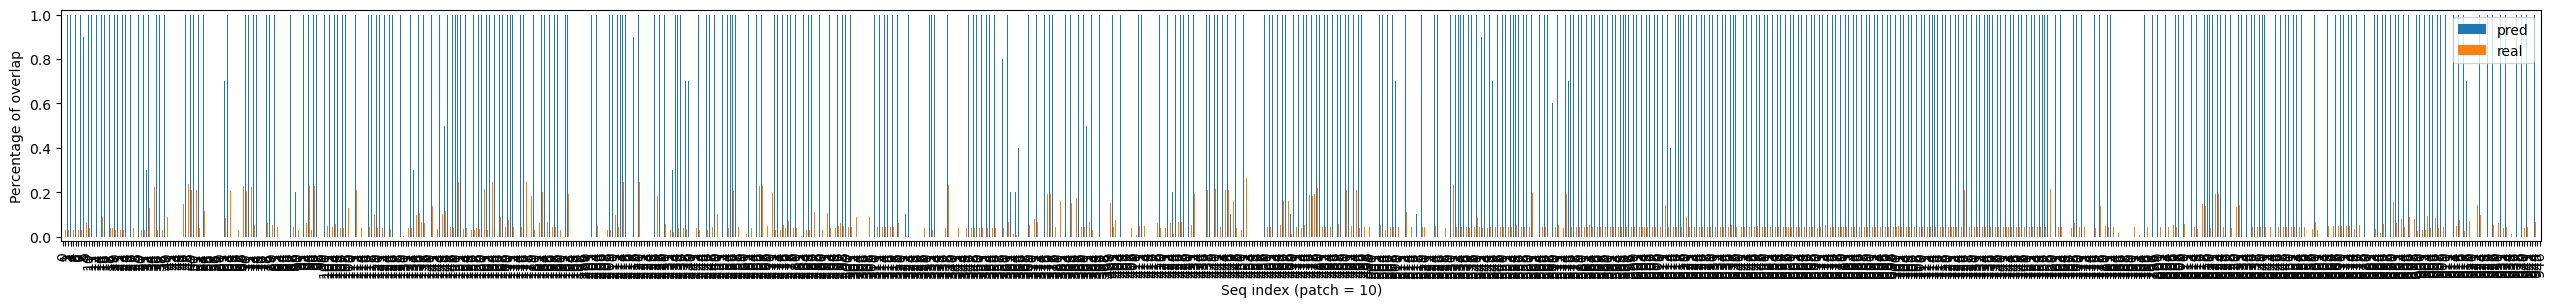

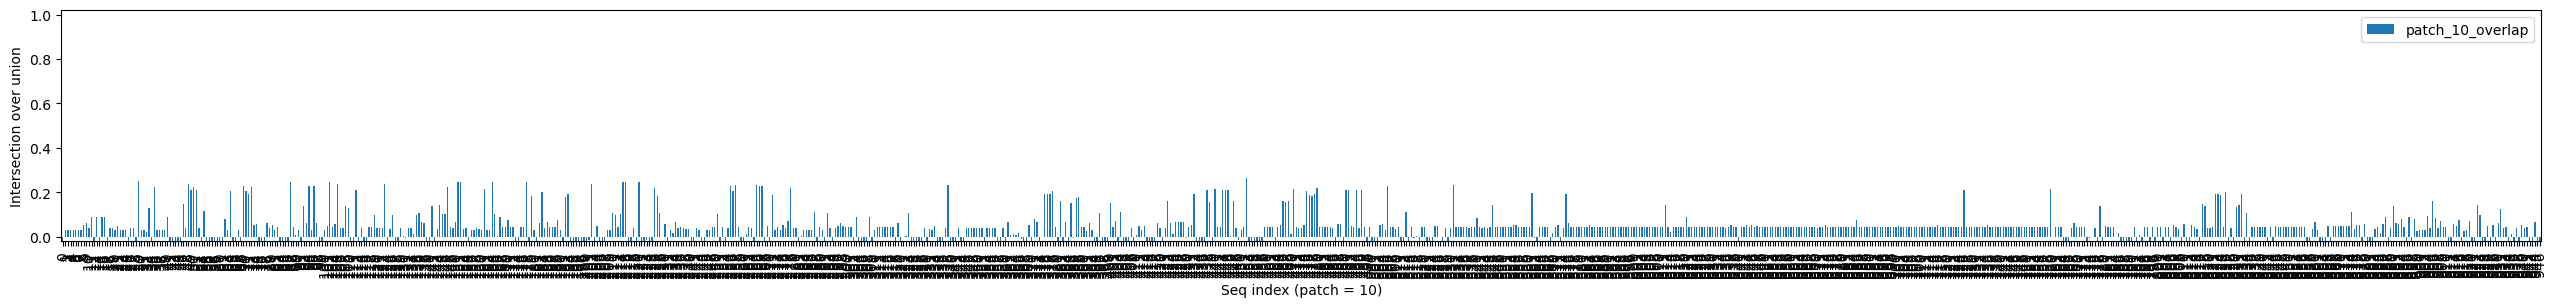

                                                                                           PATCH SIZE = 50


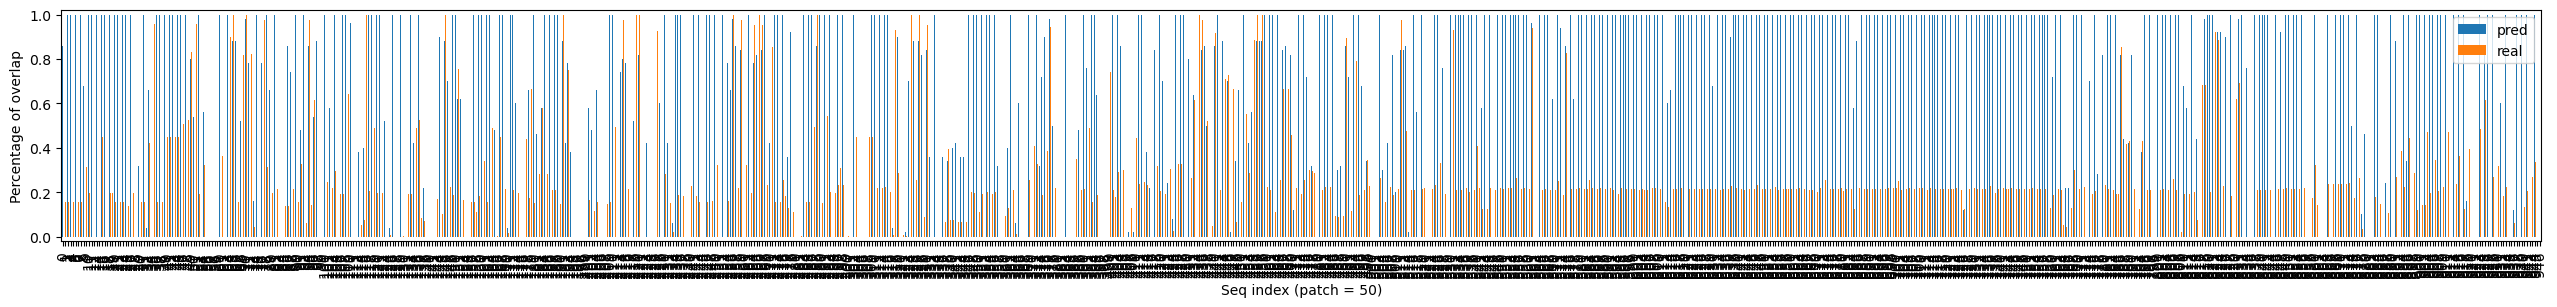

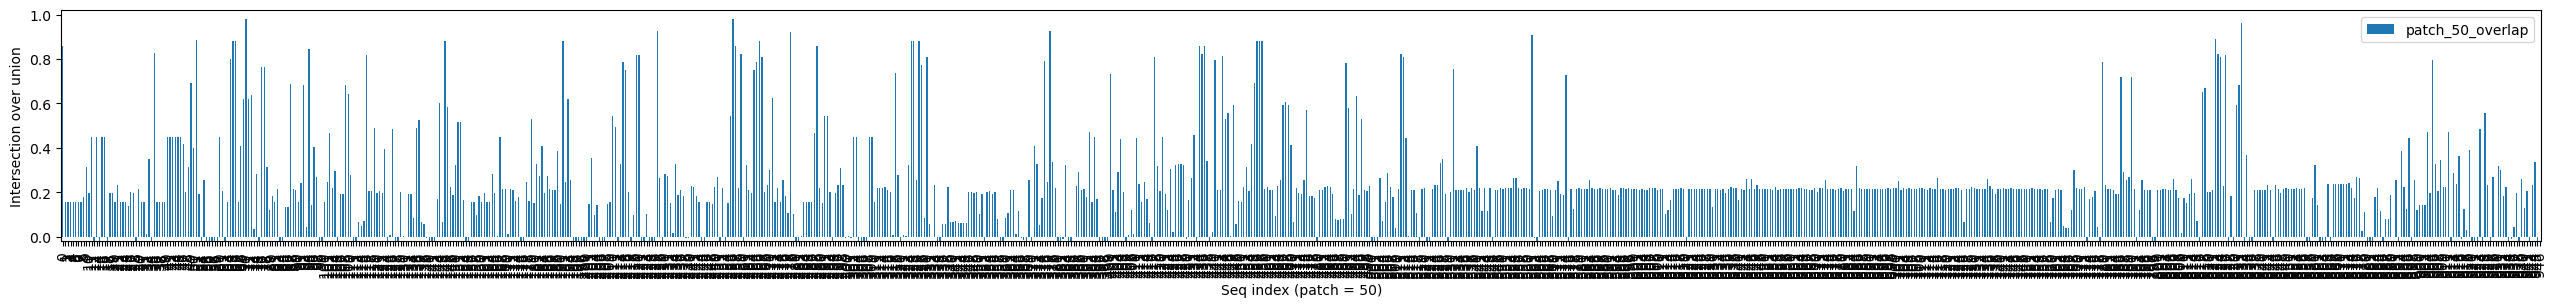

                                                                                           PATCH SIZE = 80


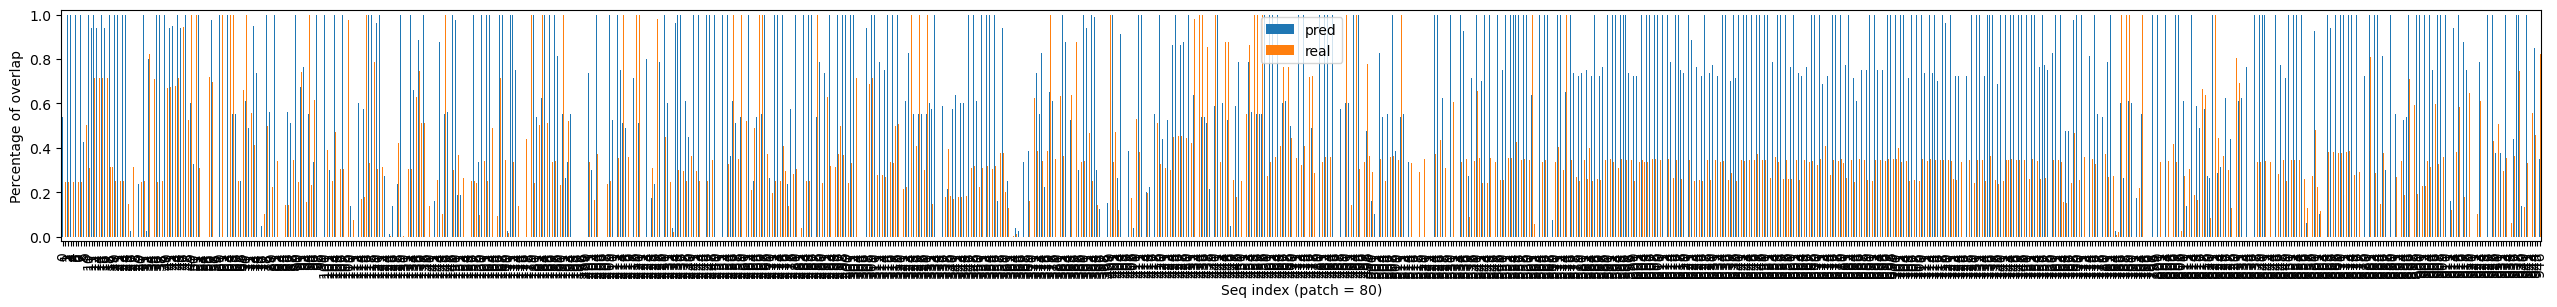

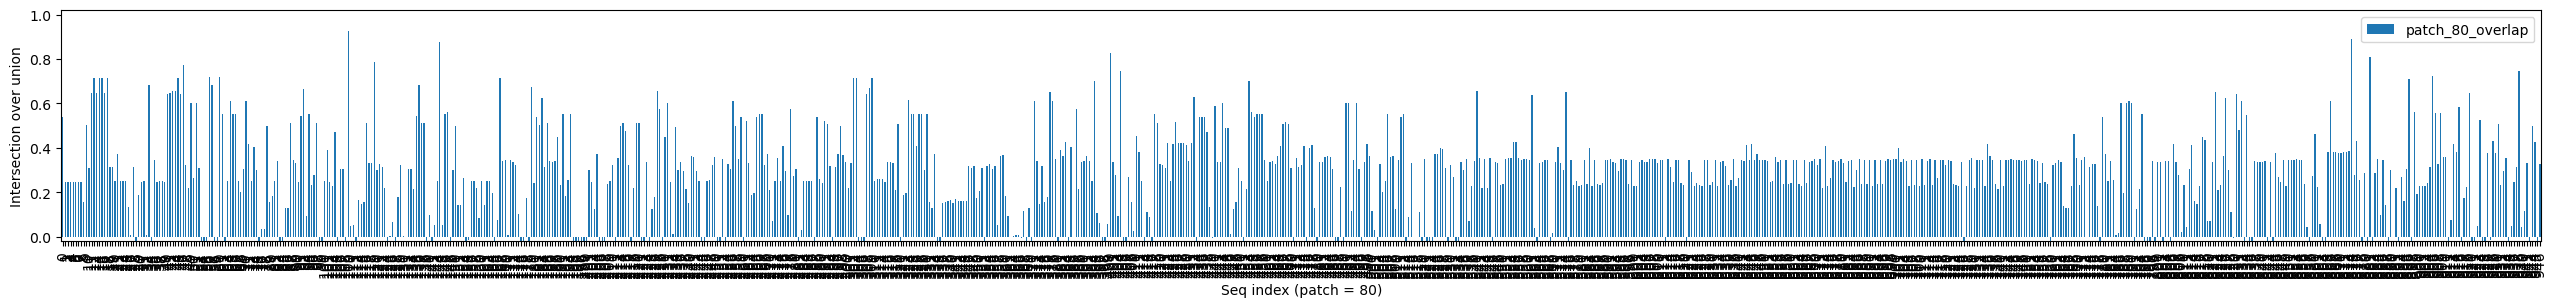

                                                                                           PATCH SIZE = 200


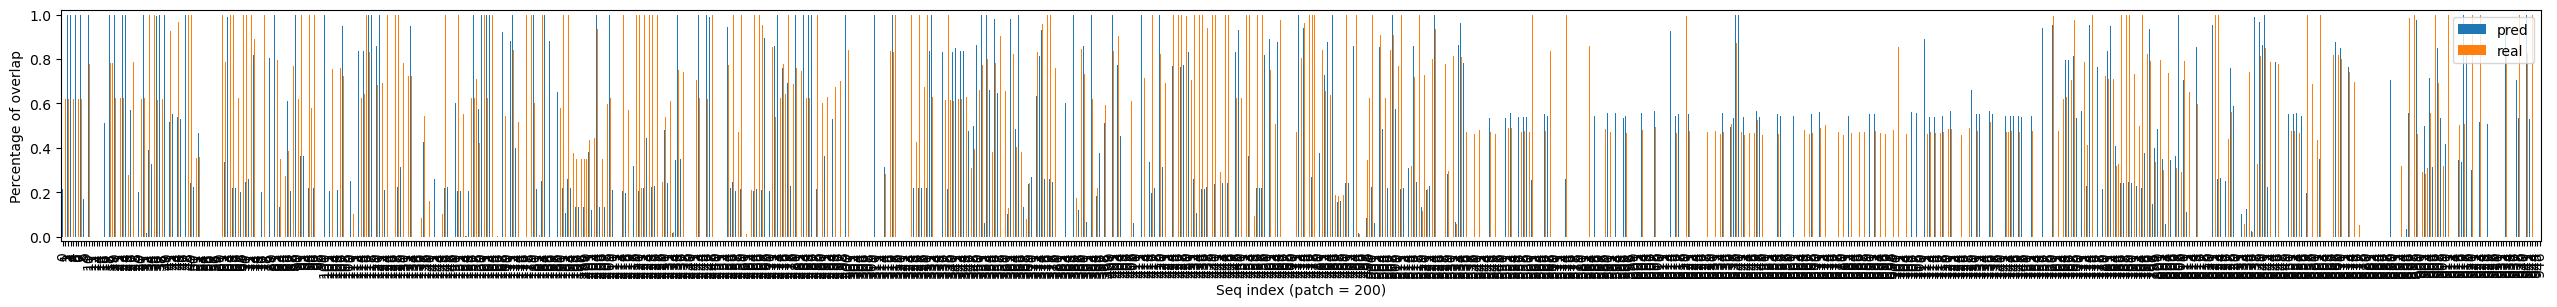

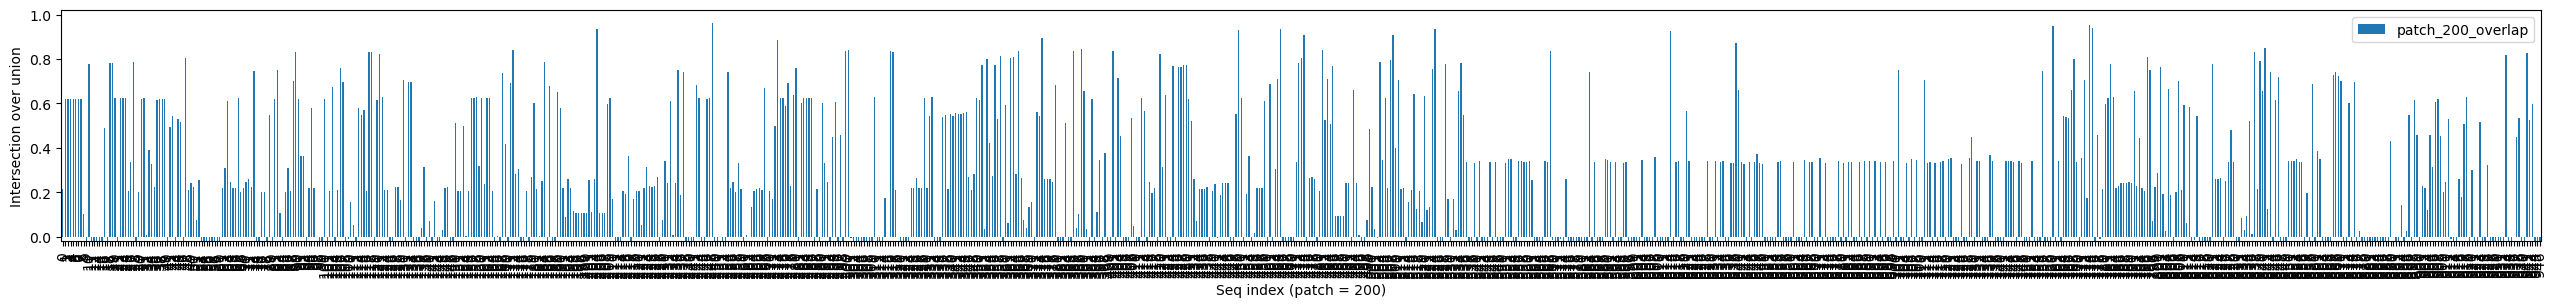

In [12]:
def plot_overlap_scores(patches, df):
    patches_len = len(patches)
    plt.rcParams['figure.figsize'] = (8 * patches_len, 3)

    for i in range(patches_len):
        patch_size = patches[i]
        print(' ' * 90 + f' PATCH SIZE = {patch_size}')

        ax = df.plot(x='index', y=[f'patch_{patch_size}_min_overlap_pred', f'patch_{patch_size}_min_overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
        ax.legend(['pred', 'real'])
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Percentage of overlap')
        plt.show()
        
        ax = df.plot(x='index', y=[f'patch_{patch_size}_overlap'], kind='bar', ylim=(-0.02,1.02))
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Intersection over union')
        plt.show()

scores_df['index'] = scores_df.index
plot_overlap_scores(PATCH_SIZES, scores_df)

### Take percentage in consideration:

In [13]:
PREDICTION_THRESHOLD = 0.5

# take only those where the prediction score dropped below some %: 
df_below = scores_df.loc[scores_df[f'patch_{patch_size}_min_pred'] < PREDICTION_THRESHOLD]
df_below

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap,index
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.000000e+00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",85.0,135.0,9.998247e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.86,1.000000,0.860000,0.5375,1.000000,0.537500,0.215,1.000000,0.215000,0
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9990893602371216, 0.9986838698387146, 0.998...",49.0,59.0,5.080617e-01,"[0.9990893602371216, 0.9162245988845825, 0.880...",288.0,338.0,7.590503e-02,"[0.9990893602371216, 0.891124427318573, 0.8160...",...,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195,1
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9983654618263245, 0.9976728558540344, 0.997...",323.0,333.0,3.917463e-01,"[0.9983654618263245, 0.8798249363899231, 0.833...",293.0,343.0,2.291701e-02,"[0.9983654618263245, 0.8471633195877075, 0.754...",...,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195,2
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,"[0.9963602423667908, 0.9947852492332458, 0.994...",323.0,333.0,2.006222e-01,"[0.9963602423667908, 0.7498754858970642, 0.671...",293.0,343.0,8.469900e-03,"[0.9963602423667908, 0.6929655075073242, 0.553...",...,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195,3
4,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,"[0.06945338100194931, 0.04197914898395538, 0.0...",333.0,343.0,4.617090e-04,"[0.06945338100194931, 0.01355342473834753, 0.0...",291.0,341.0,1.539522e-05,"[0.06945338100194931, 0.04074830934405327, 0.0...",...,1.00,0.154799,0.154799,1.0000,0.247678,0.247678,1.000,0.619195,0.619195,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,"[0.009979221038520336, 0.003908189479261637, 0...",33.0,43.0,1.400804e-06,"[0.009979221038520336, 2.009952822845662e-06, ...",22.0,72.0,1.818666e-06,"[0.009979221038520336, 7.866733358241618e-05, ...",...,0.00,0.000000,-0.498413,0.0000,0.000000,-0.381579,0.530,0.981481,0.524752,942
943,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,"[0.0006824992597103119, 0.0006852783844806254,...",270.0,280.0,2.821637e-07,"[0.0006824992597103119, 0.0005824532709084451,...",233.0,283.0,1.920636e-06,"[0.0006824992597103119, 0.0002680991601664573,...",...,0.64,0.268908,0.233577,0.8250,0.554622,0.496241,0.595,1.000000,0.595000,943
944,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,"[5.0683994778921715e-09, 2.1123882643081515e-0...",65.0,75.0,3.656996e-12,"[5.0683994778921715e-09, 1.146299855037114e-08...",33.0,83.0,1.633544e-10,"[5.0683994778921715e-09, 2.2444533342991235e-0...",...,1.00,0.337838,0.337838,0.8500,0.459459,0.425000,0.000,0.000000,-0.092025,944
945,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,"[5.172755379589944e-08, 1.497516954884759e-08,...",115.0,125.0,1.139216e-11,"[5.172755379589944e-08, 8.487016422975557e-09,...",90.0,140.0,3.173616e-10,"[5.172755379589944e-08, 7.837585371817113e-07,...",...,0.00,0.000000,-0.161905,0.0000,0.000000,-0.213333,0.000,0.000000,-0.479452,945


In [14]:
for patch_size in PATCH_SIZES: 
    print(f'Overall results for patch size ==== {patch_size} ====')
    
    print('-- w.r.t. predicted length:')
    pred_mean = df_below[f'patch_{patch_size}_min_overlap_pred'].mean()
    print(f'Mean: {pred_mean}')
    pred_med = df_below[f'patch_{patch_size}_min_overlap_pred'].median()
    print(f'Med: {pred_med}')
    pred_max = df_below[f'patch_{patch_size}_min_overlap_pred'].max()
    print(f'Max: {pred_max}')
    pred_min = df_below[f'patch_{patch_size}_min_overlap_pred'].min()
    print(f'Min: {pred_min}')
    
    print('\n-- w.r.t. real length:')
    real_mean = df_below[f'patch_{patch_size}_min_overlap_real'].mean()
    print(f'Mean: {real_mean}')
    real_med = df_below[f'patch_{patch_size}_min_overlap_real'].median()
    print(f'Med: {real_med}')
    real_max = df_below[f'patch_{patch_size}_min_overlap_real'].max()
    print(f'Max: {real_max}')
    real_min = df_below[f'patch_{patch_size}_min_overlap_real'].min()
    print(f'Min: {real_min}')
    
    print('\n-- intersection over union:')
    real_mean = df_below[f'patch_{patch_size}_overlap'].mean()
    print(f'Mean: {real_mean}')
    real_med = df_below[f'patch_{patch_size}_overlap'].median()
    print(f'Med: {real_med}')
    real_max = df_below[f'patch_{patch_size}_overlap'].max()
    print(f'Max: {real_max}')
    real_min = df_below[f'patch_{patch_size}_overlap'].min()
    print(f'Min: {real_min}')
    
    print('----------------------------------------\n')

Overall results for patch size ==== 10 ====
-- w.r.t. predicted length:
Mean: 0.7235356762513312
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.04966545972721277
Med: 0.0423728813559322
Max: 0.25
Min: 0.0

-- intersection over union:
Mean: -0.03198606345594296
Med: 0.0423728813559322
Max: 0.25
Min: -0.8381742738589212
----------------------------------------

Overall results for patch size ==== 50 ====
-- w.r.t. predicted length:
Mean: 0.7280085197018105
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.25198669025134707
Med: 0.21367521367521367
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.19708765426047734
Med: 0.2127659574468085
Max: 0.98
Min: -0.7275862068965517
----------------------------------------

Overall results for patch size ==== 80 ====
-- w.r.t. predicted length:
Mean: 0.6726171458998935
Med: 0.7875
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.34491193885984067
Med: 0.3333333333333333
Max: 1.0
Min: 0.0

-- intersection over union:
Mean:

In [15]:
get_simple_results_positive(df_below)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,657,0.699681,0,0.000000,0,0.0
1,50,523,0.556976,22,0.023429,0,0.0
2,80,395,0.420660,66,0.070288,0,0.0
3,200,89,0.094782,129,0.137380,0,0.0


In [16]:
# compare with results when the prediction was not taken into consideration:
get_simple_results_positive(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,664,0.701162,0,0.000000,0,0.0
1,50,523,0.552270,22,0.023231,0,0.0
2,80,395,0.417107,66,0.069694,0,0.0
3,200,89,0.093981,137,0.144667,0,0.0


In [17]:
get_simple_results_negative(df_below)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,235,0.250266,825,0.878594,228,0.242812
1,50,161,0.171459,201,0.214058,140,0.149095
2,80,155,0.165069,167,0.177849,132,0.140575
3,200,376,0.400426,368,0.391906,344,0.366347


In [18]:
get_simple_results_negative(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,236,0.249208,826,0.872228,229,0.241816
1,50,161,0.170011,201,0.212249,140,0.147835
2,80,155,0.163675,167,0.176346,132,0.139388
3,200,376,0.397043,368,0.388596,344,0.363252


                                                                                           PATCH SIZE = 10


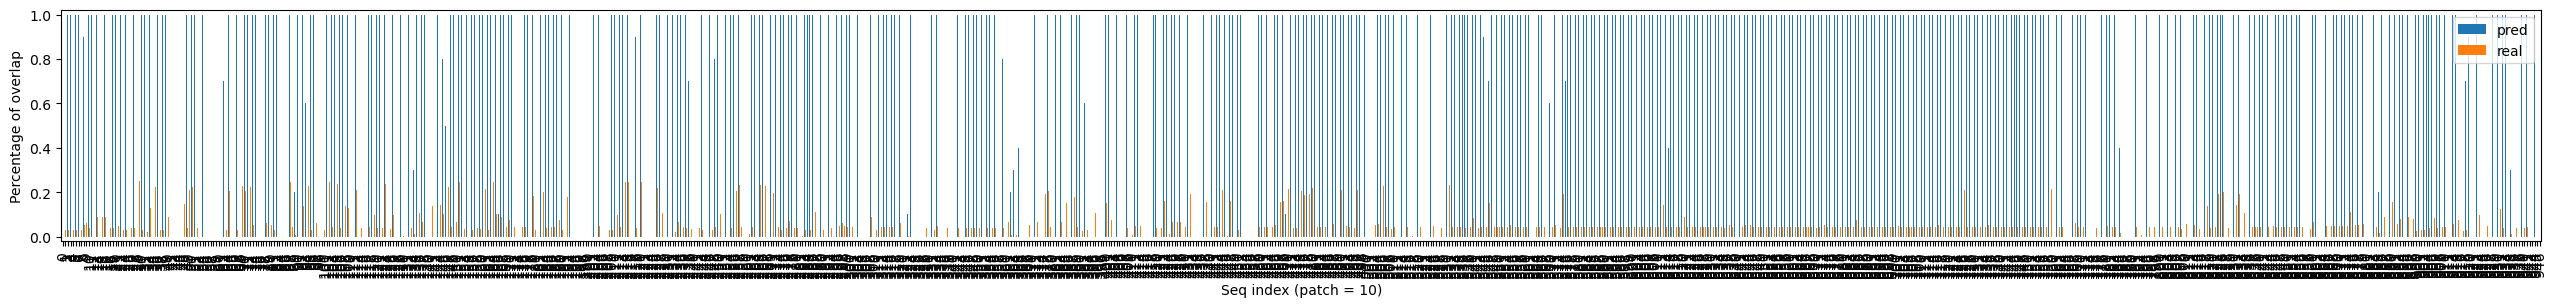

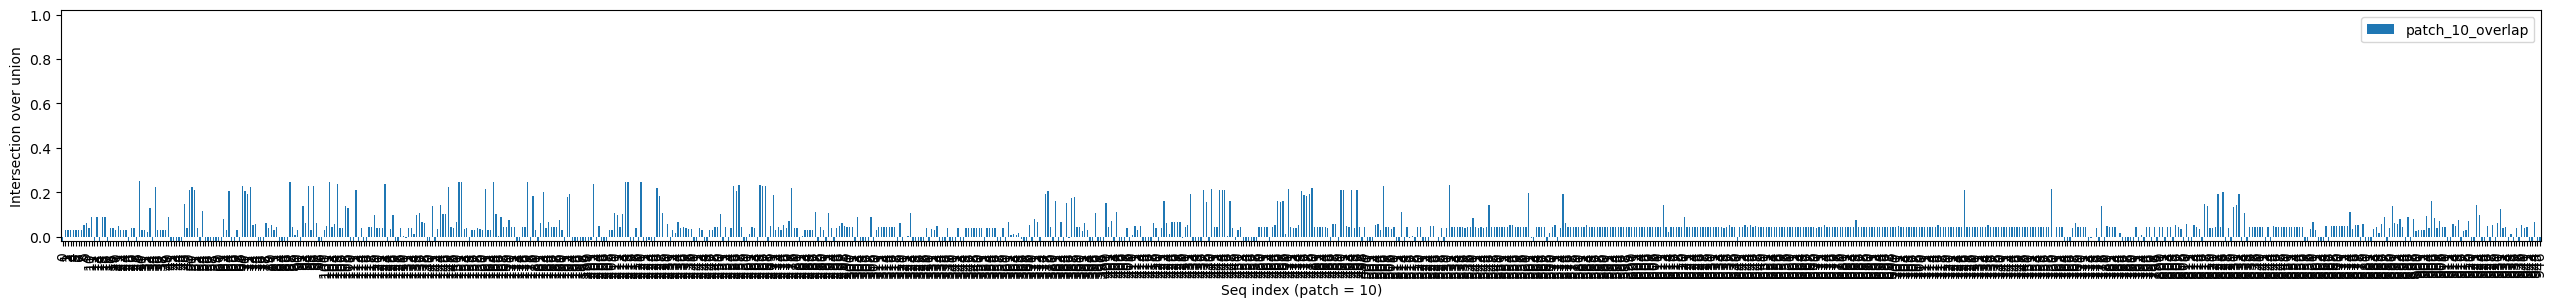

                                                                                           PATCH SIZE = 50


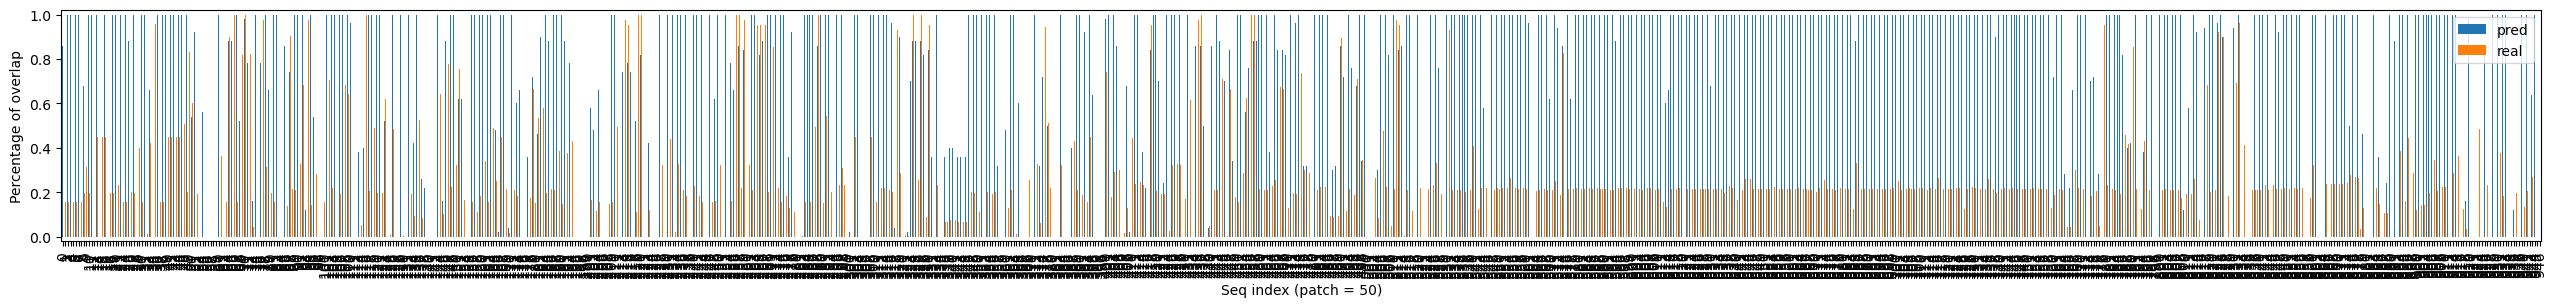

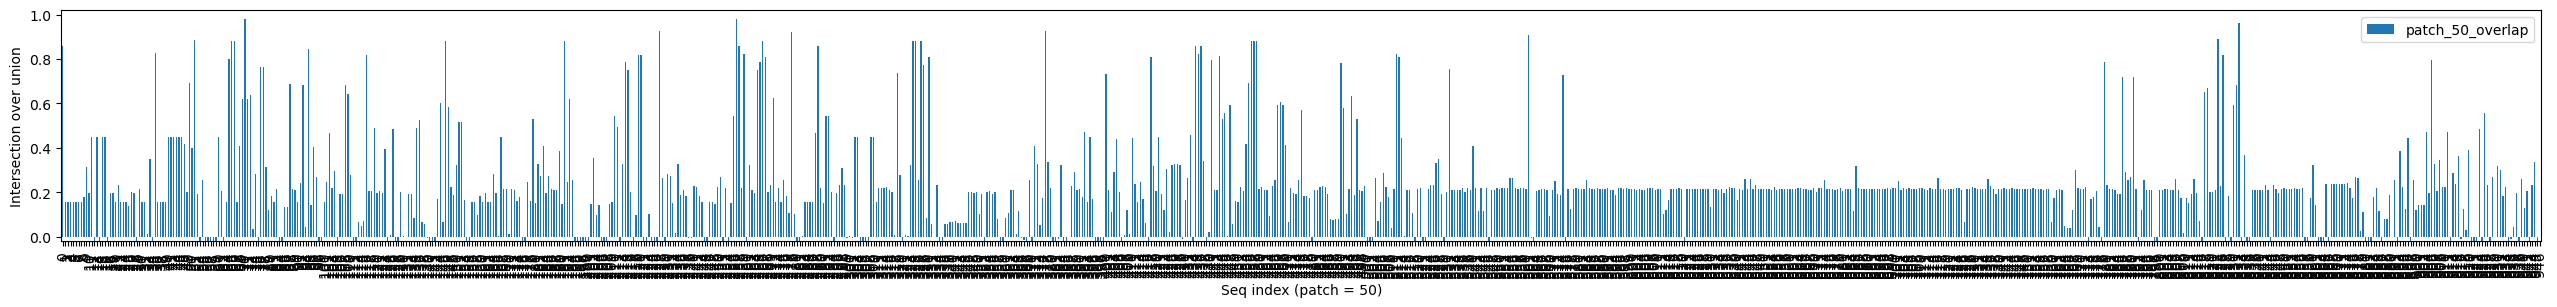

                                                                                           PATCH SIZE = 80


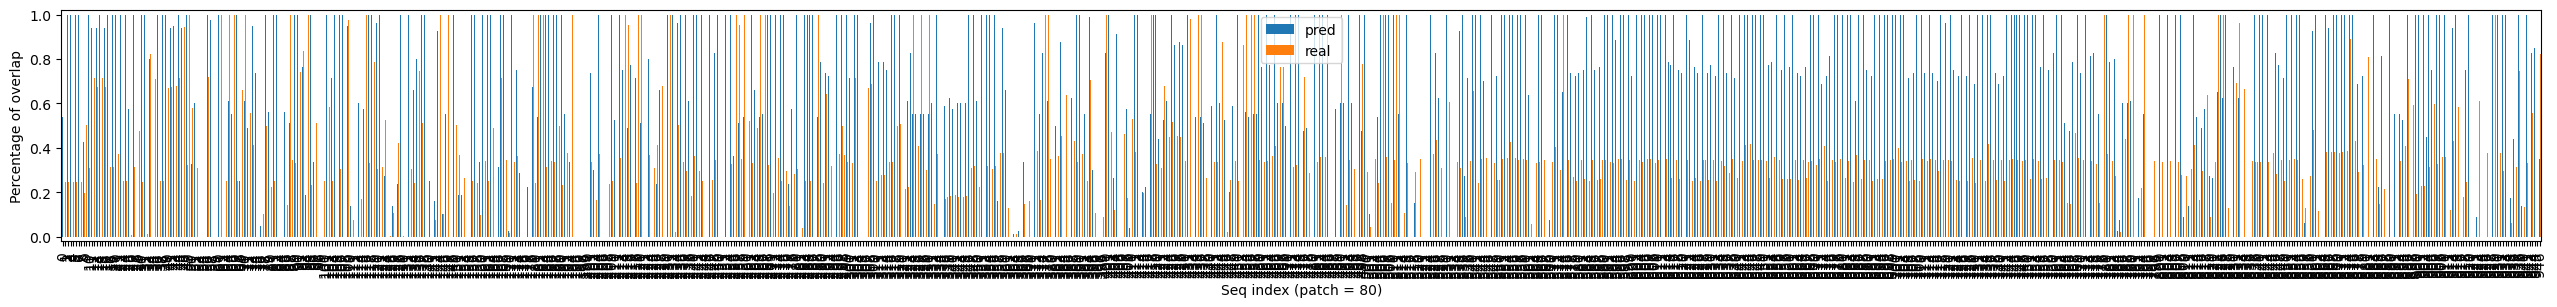

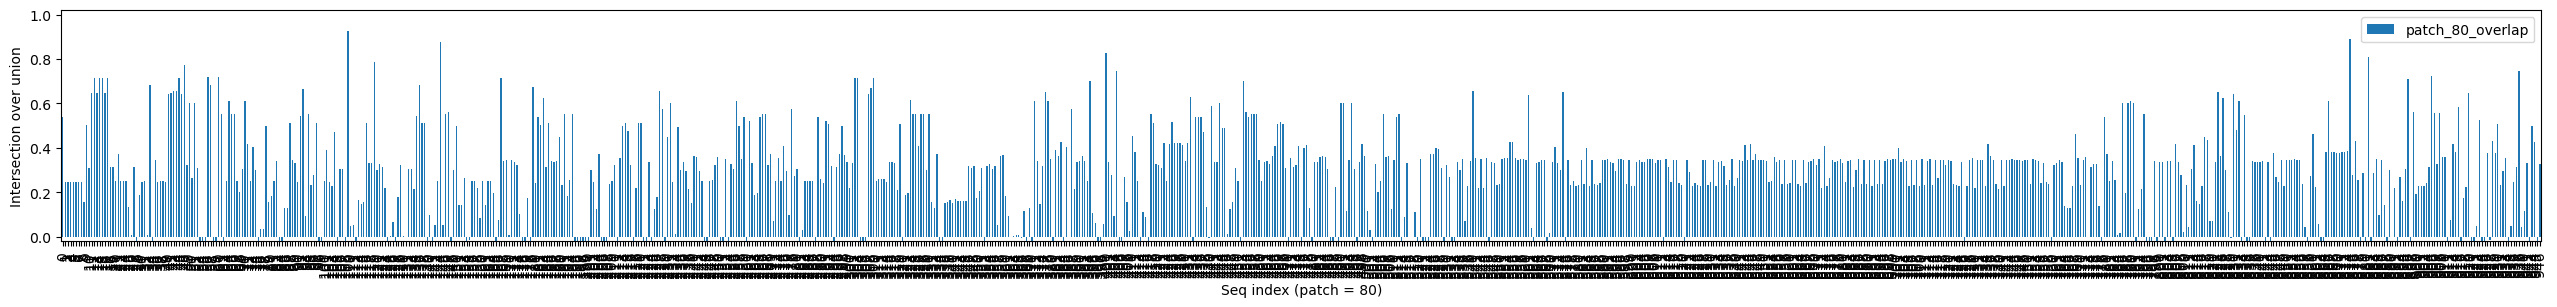

                                                                                           PATCH SIZE = 200


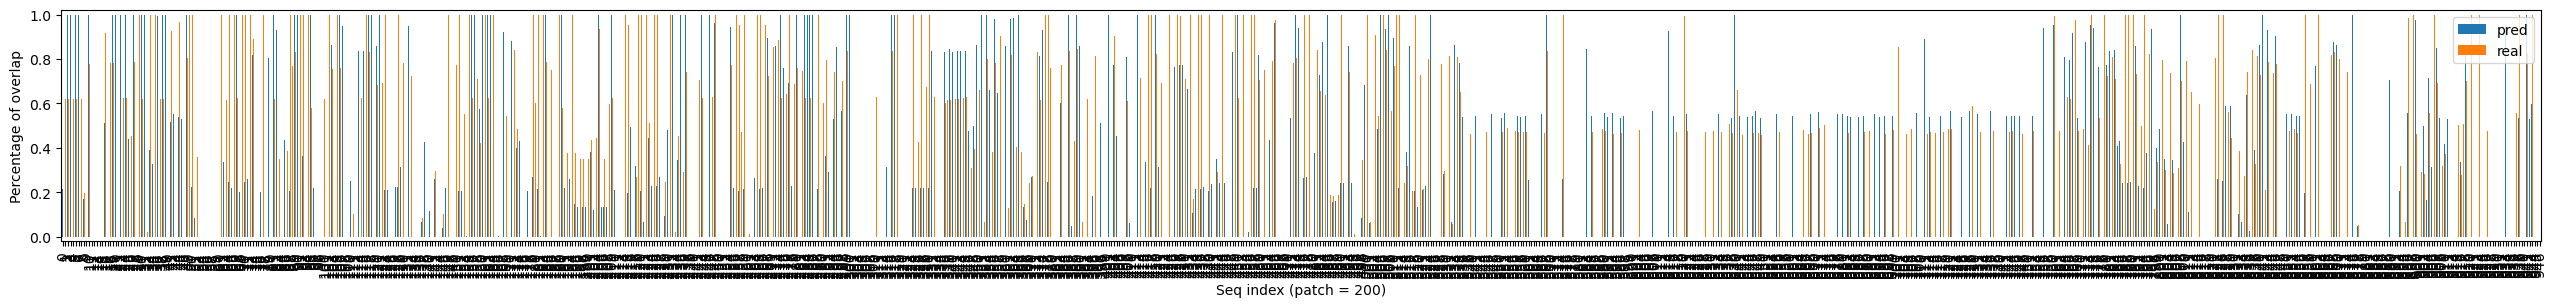

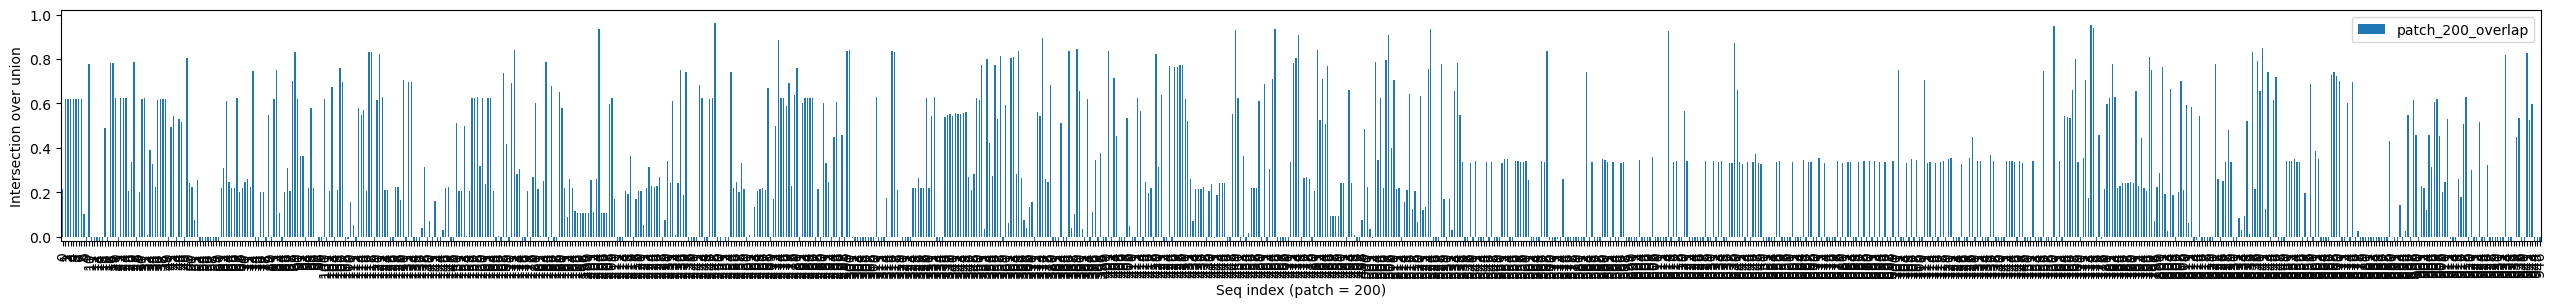

In [19]:
def plot_overlap_scores(patches, df):
    patches_len = len(patches)
    plt.rcParams['figure.figsize'] = (8 * patches_len, 3)

    for i in range(patches_len):
        patch_size = patches[i]
        print(' ' * 90 + f' PATCH SIZE = {patch_size}')

        ax = df_below.plot(x='index', y=[f'patch_{patch_size}_min_overlap_pred', f'patch_{patch_size}_min_overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
        ax.legend(['pred', 'real'])
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Percentage of overlap')
        plt.show()
        
        ax = df_below.plot(x='index', y=[f'patch_{patch_size}_overlap'], kind='bar', ylim=(-0.02,1.02))
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Intersection over union')
        plt.show()

plot_overlap_scores(PATCH_SIZES, scores_df)